# Automated Content Moderation

## 1) Problem Statement
* Given a dataset of user-generated content (e.g., text, images, or multimodal posts), the goal is to build a deep learning model that can automatically detect and classify harmful or inappropriate content (such as NSFW and hate speech) to support safe and trustworthy platform moderation.

## 2) Objective
* The purpose of this exploratory data analysis is to understand the dataset’s structure, quality, and label distribution in order to prepare it for downstream model training.

## 3) Dataset Description
* Source: [MMHS150k Kaggle Dataset](https://www.kaggle.com/datasets/victorcallejasf/multimodal-hate-speech)
* Modalities: Text captions and images
* Size: 150,000 rows
* Labels/Annotations:
  * 0 - NoHate
  * 1 - Racist
  * 2 - Sexist
  * 3 - Homophobe
  * 4 - Religion
  * 5 - OtherHate
  * 6 - NSFW/Nudity

In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


KeyboardInterrupt: 

In [23]:
df = pd.read_json('../src/data/MMHS150K_GT.json')
# df

In [24]:
df = df.transpose()
df

,img_url,labels,tweet_url,tweet_text,labels_str
2005-04-28 09:09:13.714016256,http://pbs.twimg.com/tweet_video_thumb/D3gi9MH...,"[4, 1, 3]",https://twitter.com/user/status/11146793537140...,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,"[Religion, Racist, Homophobe]"
2003-09-08 11:20:48.816660480,http://pbs.twimg.com/ext_tw_video_thumb/106301...,"[5, 5, 5]",https://twitter.com/user/status/10630200488166...,My horses are retarded https://t.co/HYhqc6d5WN,"[OtherHate, OtherHate, OtherHate]"
2005-02-20 19:22:48.075374593,http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg,"[0, 0, 0]",https://twitter.com/user/status/11089273680753...,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,"[NotHate, NotHate, NotHate]"
2005-04-26 23:35:34.635618305,http://pbs.twimg.com/ext_tw_video_thumb/111401...,"[1, 0, 0]",https://twitter.com/user/status/11145585346356...,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,"[Racist, NotHate, NotHate]"
2002-10-22 02:08:00.215592966,http://pbs.twimg.com/media/Dl30pGIU8AAVGxO.jpg,"[1, 0, 1]",https://twitter.com/user/status/10352524802155...,“EVERYbody calling you Nigger now!” https://t....,"[Racist, NotHate, Racist]"
...,...,...,...,...,...
2005-04-22 11:52:14.472048640,http://pbs.twimg.com/tweet_video_thumb/D3ZUXNw...,"[2, 5, 0]",https://twitter.com/user/status/11141707344720...,@svdate @gtconway3d I would just say hes Donny...,"[Sexist, OtherHate, NotHate]"
2005-03-09 11:36:38.786846720,http://pbs.twimg.com/ext_tw_video_thumb/111036...,"[0, 0, 0]",https://twitter.com/user/status/11103681987868...,@Cheftime_Dev congrats my nigga keep on grindi...,"[NotHate, NotHate, NotHate]"
2005-01-28 19:50:58.540851200,http://pbs.twimg.com/media/D1yluGmXgAEKNG5.jpg,"[0, 1, 0]",https://twitter.com/user/status/11069418585408...,My nigga big shitty https://t.co/e0snJGBgH9,"[NotHate, Racist, NotHate]"
2005-01-09 10:58:29.233188865,http://pbs.twimg.com/tweet_video_thumb/D1azqiz...,"[1, 0, 0]",https://twitter.com/user/status/11052683092331...,did she just say “my nigga” to Rich? &amp; she...,"[Racist, NotHate, NotHate]"


In [25]:
df.rename(columns={'tweet_url': 'tweet_id'}, inplace=True) 
df["tweet_id"] = df["tweet_id"].str.extract(r"status/(\d+)") # get rid of extra url
df = df.reset_index(drop=True).set_index("tweet_id")

df.drop(['img_url', "labels_str"], axis=1, inplace=True)

df = df[['tweet_text', 'labels']]
df.to_csv("../src/data/MMHS150K_GT_transformed.csv", index=True)
df


,tweet_text,labels
tweet_id,,
1114679353714016256,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,"[4, 1, 3]"
1063020048816660480,My horses are retarded https://t.co/HYhqc6d5WN,"[5, 5, 5]"
1108927368075374593,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,"[0, 0, 0]"
1114558534635618305,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,"[1, 0, 0]"
1035252480215592966,“EVERYbody calling you Nigger now!” https://t....,"[1, 0, 1]"
...,...,...
1114170734472048640,@svdate @gtconway3d I would just say hes Donny...,"[2, 5, 0]"
1110368198786846720,@Cheftime_Dev congrats my nigga keep on grindi...,"[0, 0, 0]"
1106941858540851200,My nigga big shitty https://t.co/e0snJGBgH9,"[0, 1, 0]"


In [26]:
# check for duplicate index
df.index.has_duplicates

False

In [27]:
'''
I ran a program (nsfw_extract) beforehand to extract all NSFW/Nudity images from 
the original MMHS150K dataset which I've downloaded locally from Kaggle.
'''

nsfw_img_folder_path = Path("D:/Datasets/auto mod ml db/nsfw_img_resized")


# get nsfw img ids and save them into .txt

df = pd.read_csv('../src/data/MMHS150K_GT_transformed.csv')
df = df.reset_index(drop=True).set_index("tweet_id")
df.index = df.index.astype(str)

output_file = "../src/data/nsfw_tweets.txt"

file_names = [f.stem for f in nsfw_img_folder_path.glob("*.jpg")]

with open(output_file, "w") as f:
    for name in file_names:
        f.write(name + "\n")

print(f"{len(file_names)} saved")


7804 saved


In [28]:
# extract all rows that matches from the nsfw_tweets.txt
ids_file = "../src/data/nsfw_tweets.txt"
output_file = "../src/data/MMHS150K_nsfw_only.csv"

with open(ids_file, "r") as f:
    id_list = list({int(line.strip()) for line in f if line.strip()})

df.index = df.index.astype(int)

df_nsfw = df.loc[df.index.intersection(id_list)]

df_nsfw.to_csv(output_file, index=True)

df_nsfw

,tweet_text,labels
tweet_id,,
1045809514740666370,#sissy faggot https://t.co/bm1nk8HcYO,"[3, 3, 0]"
1114918192403578884,bf: move your bighead 😅😂 gf: NIGGA WHAT?? THA...,"[2, 2, 1]"
1110349746495983623,Cardi got a new nigga every season she in love...,"[0, 0, 1]"
1060885803423883264,me cos theres no strange brooding women w dyke...,"[2, 0, 0]"
1108457506882441222,I am proud to #serve the #superior #alphamale ...,"[0, 0, 0]"
...,...,...
1107352666722787329,Full Video: https://t.co/RMuTXWxGBD Blonde MIL...,"[0, 0, 0]"
1107416056170201089,Gimme Some Dick Nigga!!!!! https://t.co/LaLr4X...,"[3, 0, 0]"
1106523045676621825,Relapsing Faggot..... #findom # piggy #paypig ...,"[0, 3, 0]"


In [29]:
# bad ids from bad url handling
# load ids from nsfw_tweets.txt

with open("../src/data/nsfw_tweets.txt", "r") as f:
    ids_file = [line.strip() for line in f if line.strip()]

# ids from df_nsfw as integers
ids_df = set(df_nsfw.index.astype(int))

# compute bad IDs
in_file_not_in_df = {int(i) for i in ids_file} - ids_df

# compute cleaned list
clean_ids = [i for i in ids_file if int(i) not in in_file_not_in_df]

# overwrite file
with open("../src/data/nsfw_tweets.txt", "w") as f:
    for i in clean_ids:
        f.write(i + "\n")

print(f"Removed {len(in_file_not_in_df)} IDs. Cleaned file now has {len(clean_ids)} IDs.")




Removed 7 IDs. Cleaned file now has 7797 IDs.


In [30]:
# the goal is to have a 6 - Nudity/NSFW replace a duplicate label a or 0 - NoHate ;abe;
# below will replace a duplicate label or a 0 with a 6

import ast
df_nsfw["labels"] = df_nsfw["labels"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x #convert dtype to list for labels col
)

def newLabel(lst, label):
    seen = set()
    out = []
    replaced=False
    for x in lst:
        if x in seen and not replaced:
            out.append(label) 
            replaced=True
        else:
            out.append(x)
            seen.add(x)
    return out

df_nsfw_label = df_nsfw.copy()
df_nsfw_label["labels"] = df_nsfw["labels"].apply(lambda x: newLabel(x, 6))
df_nsfw_label.to_csv("../src/data/MMHS150K_with_new_nsfw_label.csv", index=True)

df_nsfw_label

,tweet_text,labels
tweet_id,,
1045809514740666370,#sissy faggot https://t.co/bm1nk8HcYO,"[3, 6, 0]"
1114918192403578884,bf: move your bighead 😅😂 gf: NIGGA WHAT?? THA...,"[2, 6, 1]"
1110349746495983623,Cardi got a new nigga every season she in love...,"[0, 6, 1]"
1060885803423883264,me cos theres no strange brooding women w dyke...,"[2, 0, 6]"
1108457506882441222,I am proud to #serve the #superior #alphamale ...,"[0, 6, 0]"
...,...,...
1107352666722787329,Full Video: https://t.co/RMuTXWxGBD Blonde MIL...,"[0, 6, 0]"
1107416056170201089,Gimme Some Dick Nigga!!!!! https://t.co/LaLr4X...,"[3, 0, 6]"
1106523045676621825,Relapsing Faggot..... #findom # piggy #paypig ...,"[0, 3, 6]"


In [31]:
# find all labels wth no 6 or 0
df_nsfw_no_new_label = df_nsfw_label[df_nsfw_label["labels"].apply(lambda x: 6 not in x and 0 not in x)].copy()

# df_nsfw_no_new_label

df_nsfw_no_new_label.shape

'''
I'll leave these rows as is for now. I haven't decided what I will do with these yet but since its
only 60 rows I think it'll be alright to leave them as is an proceed.
'''

"\nI'll leave these rows as is for now. I haven't decided what I will do with these yet but since its\nonly 60 rows I think it'll be alright to leave them as is an proceed.\n"

In [32]:
# make a new dataset that replaces original datset rows with new rows that include nsfw tag

df = pd.read_csv("../src/data/MMHS150K_GT_transformed.csv")
df_nsfw = pd.read_csv("../src/data/MMHS150K_with__new_nsfw_label.csv")

df = df.reset_index(drop=True).set_index("tweet_id")
df_nsfw = df_nsfw.reset_index(drop=True).set_index("tweet_id")

df.update(df_nsfw)

df.to_csv("../src/data/MMHS150K_with_nsfw_label_final.csv", index=True)
df

FileNotFoundError: [Errno 2] No such file or directory: '../src/data/MMHS150K_with__new_nsfw_label.csv'

# Exploratory Data Analysis

In [ ]:
df = pd.read_csv("../src/data/MMHS150K_with_nsfw_label_final.csv")

## Data Structure Checks

### Shape of Dataframe

In [ ]:
df.shape

(149823, 3)

### Check for Null Values

In [ ]:
df.isnull().sum()


tweet_id      0
tweet_text    0
labels        0
dtype: int64

### Check for duplicate tweet_id

In [ ]:
df["tweet_id"].duplicated().sum()

np.int64(0)

### Check "labels" column that have more than or less than 3 labels

In [ ]:
df["labels"].apply(len).value_counts()

labels
9     149749
12        37
6         30
3          4
15         3
Name: count, dtype: int64

### Keep rows where "labels" column exactly has 3 labels

In [ ]:
df["labels"] = df["labels"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df["labels"] = df["labels"].tolist()
df = df[df["labels"].apply(len) == 3].reset_index(drop=True)


In [ ]:
df["labels"].apply(len).value_counts()

labels
3    149749
Name: count, dtype: int64

## Labels Column Exploration
* 0 - NotHate 
* 1 - Racist 
* 2 - Sexist 
* 3 - Homophobe 
* 4 - Religion 
* 5 - OtherHate
* 6 - NSFW/Nudity

### Flatten 'Labels' Column
Make it so that each element in the lsit of the labels column is in its own row

In [ ]:
df_labels_col = pd.DataFrame(df["labels"].tolist(), index=df.index)
df_labels_col.columns = ["label1", "label2", "label3"]

df = pd.concat([df.drop(columns=["labels"]), df_labels_col], axis=1)
df

,tweet_id,tweet_text,label1,label2,label3
0,1114679353714016256,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,4,1,3
1,1063020048816660480,My horses are retarded https://t.co/HYhqc6d5WN,5,5,5
2,1108927368075374593,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,0,0,0
3,1114558534635618305,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,1,0,0
4,1035252480215592966,“EVERYbody calling you Nigger now!” https://t....,1,0,1
...,...,...,...,...,...
149744,1114170734472048640,@svdate @gtconway3d I would just say hes Donny...,2,5,0
149745,1110368198786846720,@Cheftime_Dev congrats my nigga keep on grindi...,0,0,0
149746,1106941858540851200,My nigga big shitty https://t.co/e0snJGBgH9,0,1,0
149747,1105268309233188865,did she just say “my nigga” to Rich? &amp; she...,1,0,0


### Frequency of each label

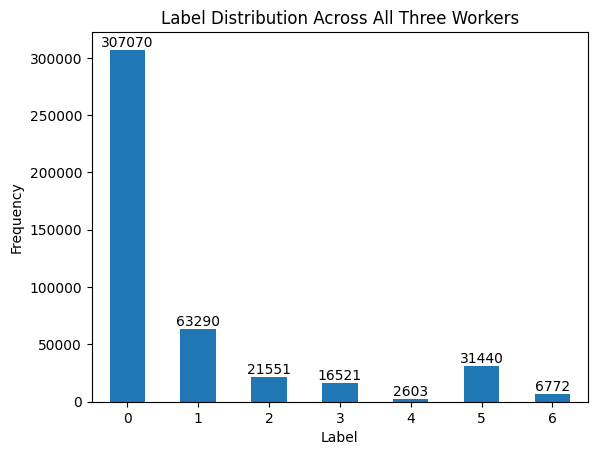

<Figure size 1000x500 with 0 Axes>

In [ ]:
label_cols = ['label1','label2','label3']
all_labels = pd.concat([df[col] for col in label_cols])

label_counts = all_labels.value_counts().sort_index()

ax = label_counts.plot(
    kind='bar',
    rot=0
)
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.title("Label Distribution Across All Three Workers")

# add counts on top
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )
plt.figure(figsize=(10,5))
plt.show()

### Co-occurence/heatmap of label pairs

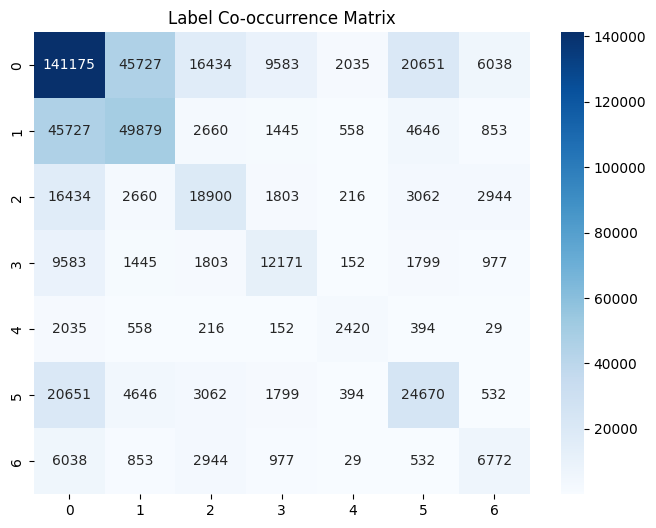

In [ ]:
from itertools import combinations

# Collect all unique label values
all_labels = pd.unique(df[['label1','label2','label3']].values.ravel())
all_labels.sort()

# Initialize co-occurrence matrix
co_mat = pd.DataFrame(0, index=all_labels, columns=all_labels, dtype=int)

# Loop rows, update counts
for _, row in df[['label1','label2','label3']].iterrows():
    labels = set(row.values)
    for a, b in combinations(labels, 2):   # all unique pairs
        co_mat.loc[a,b] += 1
        co_mat.loc[b,a] += 1
    # diagonal = count of each label
    for l in labels:
        co_mat.loc[l,l] += 1

# Visualize
plt.figure(figsize=(8,6))
sns.heatmap(co_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Label Co-occurrence Matrix")
plt.show()